In [ ]:
!pip install git+https://github.com/Kaggle/kaggle-api.git --upgrade
import os
credentials = {"username":"muntahashams","key":"f9b104e85dd7a74eab8a876f8d5b9536"}
os.environ['KAGGLE_USERNAME']=credentials["username"]
os.environ['KAGGLE_KEY']=credentials["key"]
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

## **Setup**

In [ ]:
import numpy as np 
import pandas as pd 
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers



In [ ]:
with_maskImage = os.listdir('/content/data/with_mask')
without_maskImage = os.listdir('/content/data/without_mask')

In [ ]:
print(len(with_maskImage))
print(len(without_maskImage))

3725
3828


## **Create a dataset**

In [ ]:
batch_size = 16
img_height = 200
img_width = 200


In [ ]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [ ]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/data',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [ ]:
class_names = training_ds.class_names
print(class_names)

['with_mask', 'without_mask']


### **Visualizing Training data**

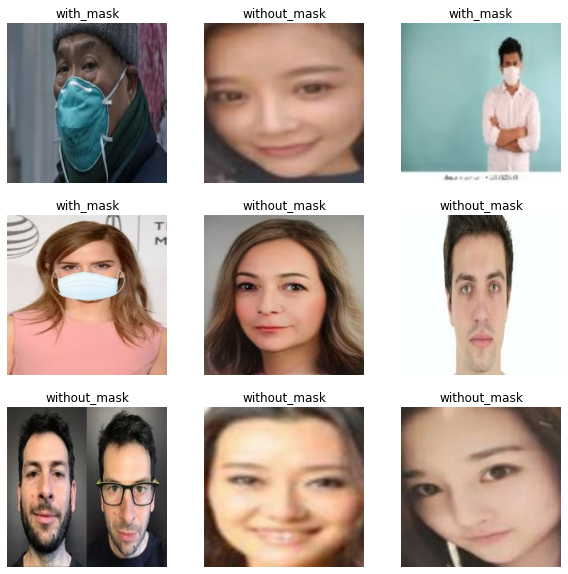

In [ ]:
image_batch, label_batch = next(iter(training_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

## **Configure the dataset for performance**
Let's make sure to use buffered prefetching so we can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

**.cache()** keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

**.prefetch()** overlaps data preprocessing and model execution while training.

In [ ]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

### **Define CNN**

In [ ]:
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(512, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])


In [ ]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **Train CNN**

In [ ]:

model_saved = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 20)

MyCnn.save('mymodel.h5',model_saved)

Epoch 1/20
378/378 [==============================] - 7s 16ms/step - loss: 0.5425 - accuracy: 0.7169 - val_loss: 0.3493 - val_accuracy: 0.8596
Epoch 2/20
378/378 [==============================] - 6s 15ms/step - loss: 0.3644 - accuracy: 0.8475 - val_loss: 0.2742 - val_accuracy: 0.8940
Epoch 3/20
378/378 [==============================] - 6s 15ms/step - loss: 0.2879 - accuracy: 0.8832 - val_loss: 0.2402 - val_accuracy: 0.9079
Epoch 4/20
378/378 [==============================] - 6s 15ms/step - loss: 0.2426 - accuracy: 0.9039 - val_loss: 0.2038 - val_accuracy: 0.9272
Epoch 5/20
378/378 [==============================] - 6s 15ms/step - loss: 0.2226 - accuracy: 0.9186 - val_loss: 0.1692 - val_accuracy: 0.9430
Epoch 6/20
378/378 [==============================] - 6s 15ms/step - loss: 0.1682 - accuracy: 0.9362 - val_loss: 0.1389 - val_accuracy: 0.9556
Epoch 7/20
378/378 [==============================] - 6s 15ms/step - loss: 0.1581 - accuracy: 0.9381 - val_loss: 0.1373 - val_accuracy: 0.9536

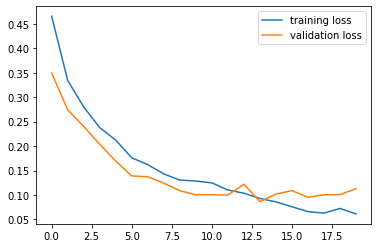

In [ ]:
plt.plot(model_saved.history['loss'], label = 'training loss')
plt.plot(model_saved.history['val_loss'], label = 'validation loss')
plt.legend()

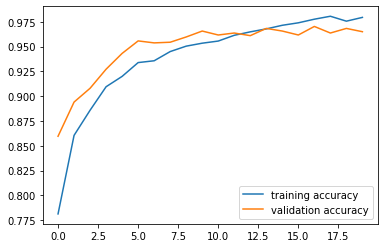

In [ ]:
plt.plot(model_saved.history['accuracy'], label = 'training accuracy')
plt.plot(model_saved.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

### **Testing of model**

In [ ]:
   
def LoadAndDetectObject(path, boxSize = 150, lim = 200):
    img = plt.imread(path)
    img = cv2.resize(img,(200,200))
    numplots = (lim / boxSize)*(lim /boxSize)
    stride = int ((lim - boxSize)/ boxSize)
    
    xCurPos = 0
    yCurPos = 0
    Red = img [:,:,0]
    Blue = img[:,:,1]
    Green = img[:,:,2]
    
    y_pos = 0
    i = 0
    while y_pos < lim:
        x_pos = 0
        while x_pos < lim:
            xCurPos = x_pos
            yCurPos = y_pos
            i += 1
            if i > numplots + 1000:
                cv2.putText(img, 'No Mask', (50,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                plt.imshow(img)
                return
            
            
            r = Red[x_pos : (x_pos + boxSize), y_pos : (y_pos + boxSize)]
            g = Blue[x_pos : (x_pos + boxSize), y_pos : (y_pos + boxSize)]
            b = Green[x_pos : (x_pos + boxSize), y_pos : (y_pos + boxSize)]
            
            ## sanity check
            xx, yy = r.shape
            if xx*yy != boxSize*boxSize:
                x_pos += stride
                continue
               
            imageSegment = cv2.merge((r,g,b))
            imageSegment  = np.array(imageSegment, dtype = 'uint8')
            imageSegment = cv2.resize(imageSegment, (lim, lim))
            result = (MyCnn.predict(np.array([imageSegment])))
            probab = max(result.flatten())
            result = (class_names[np.argmax(result)])
            #print(probab)
            
            if result == 'with_mask' and probab >= 0.8:
                probab = int (probab * 100) / 100
                img = cv2.rectangle(img, (xCurPos,yCurPos), (xCurPos + boxSize, yCurPos + boxSize), (0,255,0), 1) 
                cv2.putText(img, 'Mask', (xCurPos,yCurPos + boxSize), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 1)
                plt.imshow(img)
                return
            
            
            
            
            x_pos += stride
        y_pos += stride
        
    cv2.putText(img, 'No Mask', (100,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 1)
    plt.imshow(img)
    



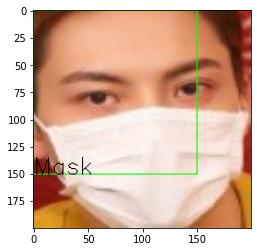

In [ ]:
LoadAndDetectObject('/content/data/with_mask/with_mask_1323.jpg')

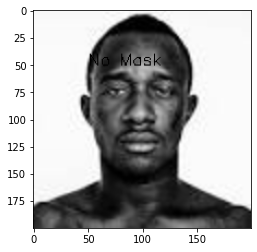

In [ ]:
LoadAndDetectObject('/content/data/without_mask/without_mask_1.jpg')

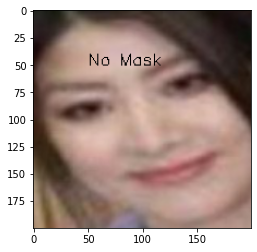

In [ ]:
LoadAndDetectObject('/content/data/without_mask/without_mask_3.jpg')

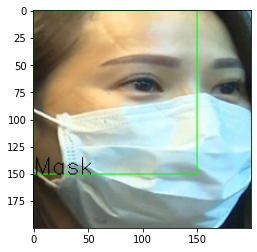

In [ ]:
LoadAndDetectObject('/content/data/with_mask/with_mask_439.jpg')